# 라이브러리 Import

In [3]:
import numpy as np
import pandas as pd
import warnings

# Ignore display of unnecessary warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
    
warnings.filterwarnings("ignore")
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
# data preprocessing libs
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# sklearn classifiers to import
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# tensorflow classifier import
import tensorflow as tf
from tensorflow.estimator import DNNClassifier

# model building, predict, accuracy imports
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from IPython.display import display

<br><br>
예제를 위한 iris 데이터 로드

In [20]:
Data = pd.read_csv("Censored_clinical_lungCancer_survival.csv")

In [21]:
Data.head()

,PatientID,Age,Sex,Smoke,COPD,DM,HTN,CEA_pre,SUV,Extent,...,pN,pStage,cell,Subtype,CEA_Post,Relapse,Recur,Recurrence,Death,Overall
0,14031352,73,2,1,0,0,1,1.0,4.11,3,...,2,4,1,4,0.0,0,0,107.833333,0,107.833333
1,9394389,73,1,1,0,0,0,1.4,3.50,3,...,2,4,1,3,1.2,0,0,144.033333,0,144.033333
2,9619514,53,1,1,0,0,0,1.7,4.20,3,...,2,4,1,3,1.8,1,1,23.233333,1,48.066667
3,9650404,57,2,1,0,1,1,1.0,1.60,3,...,2,4,1,4,0.0,0,0,93.533333,0,93.533333
4,10009869,42,1,2,0,0,0,1.0,3.30,3,...,3,5,1,2,1.2,0,0,93.066667,0,93.066667


In [22]:
Data.columns

Index(['PatientID', 'Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'CEA_pre',
       'SUV', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI',
       'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype',
       'CEA_Post', 'Relapse', 'Recur', 'Recurrence', 'Death', 'Overall'],
      dtype='object')

In [28]:
Data = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype', 'CEA_Post', 'Death']]

In [29]:
Data.isna().sum()

Age            0
Sex            0
Smoke          0
COPD           0
DM             0
HTN            0
Extent         0
Vascular       0
Lymphatic      0
Perineural     0
VPI            0
Adjacent       0
Aerogenous     0
pT             0
pN             0
pStage         0
cell           0
Subtype        0
CEA_Post      29
Death          0
dtype: int64

In [32]:
Data = Data.dropna()

In [33]:
Data.shape

(461, 20)

In [34]:
X = Data[['Age', 'Sex', 'Smoke', 'COPD', 'DM', 'HTN', 'Extent', 'Vascular', 'Lymphatic', 'Perineural', 'VPI', 'Adjacent', 'Aerogenous', 'pT', 'pN', 'pStage', 'cell', 'Subtype', 'CEA_Post']]
y = Data[['Death']]
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=42)

In [35]:
#from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [36]:
Column = X_train.columns[0]

In [38]:
pvalues = dict()
for Column in X_train.columns:
    InputFeature = sm.add_constant(X_train[Column])
    model = sm.Logit(y_train, InputFeature)
    model = model.fit()
    pvalues[Column] = model.pvalues[1]

Optimization terminated successfully.
         Current function value: 0.478076
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.496165
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497228
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.496946
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.495109
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.496766
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.486499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.486073
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.494152
  

In [39]:
pvalues

{'Age': 0.00026860929903105773,
 'Sex': 0.1155460648313425,
 'Smoke': 0.21900911763286346,
 'COPD': 0.4413535498828227,
 'DM': 0.3246395116639621,
 'HTN': 0.12572838431875202,
 'Extent': 0.2823192225646207,
 'Vascular': 0.0034182040060909513,
 'Lymphatic': 0.004416472152832317,
 'Perineural': 0.0710383251685977,
 'VPI': 0.22448298564373614,
 'Adjacent': 0.005318354880990852,
 'Aerogenous': 0.31388388549846613,
 'pT': 0.00026187968528775457,
 'pN': 0.009275445990191894,
 'pStage': 7.849100996941859e-06,
 'cell': 0.32567664266696406,
 'Subtype': 0.22502205327390412,
 'CEA_Post': 0.022943276420604033}

In [42]:
X_train = X_train[["Age", "Vascular", "Lymphatic", "Perineural", "Adjacent", "pT", "pN", "pStage", "CEA_Post"]]
X_test  = X_test [["Age", "Vascular", "Lymphatic", "Perineural", "Adjacent", "pT", "pN", "pStage", "CEA_Post"]]

<br>
범주형 데이터로 되어있는 Label (종속변수) encoding

<br><br>
독립변수, 종속변수 (X, y) 로 분리<br>
Train / Test 데이터 split

# 모든 machine learning model에 대한 parameter, Classifier 객체 선언

In [43]:
# Build parameters of all classifiers
random_forest_params = dict(n_estimators=[5, 10, 15, 20, 25], criterion=['gini', 'entropy'], 
                            max_features=[2, 3, 4, 'auto', 'log2', 'sqrt', None], bootstrap=[False, True]
                            )
decision_tree_params = dict(criterion=['gini', 'entropy'], splitter=['best', 'random'], min_samples_split=[2, 3, 4],
                            max_features=[2,3,'auto', 'log2', 'sqrt', None], class_weight=['balanced', None])

perceptron_params = dict(penalty=[None, 'l2', 'l1', 'elasticnet'], fit_intercept=[False, True], shuffle=[False, True],
                         class_weight=['balanced', None], alpha=[0.0001, 0.00025], max_iter=[30,50,90])

svm_params = dict(shrinking=[False, True], degree=[3,4], class_weight=['balanced', None])

neural_net_params = dict(activation=['identity', 'logistic', 'tanh', 'relu'], hidden_layer_sizes = [(20,15,10),(30,20,15,10),(16,8,4)], 
                         max_iter=[50,80,150], solver=['adam','lbfgs'], learning_rate=['constant', 'invscaling', 'adaptive'], shuffle=[True, False])

log_reg_params = dict(class_weight=['balanced', None], solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'], fit_intercept=[True, False])

knn_params = dict(n_neighbors=[2, 3, 5, 10], weights=['uniform', 'distance'],
                  algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'], leaf_size=[5,10,15,20])

bagging_params = dict(n_estimators=[5, 12, 15, 20], bootstrap=[False, True])

ada_boost_params = dict(n_estimators=[50, 75, 100], algorithm=['SAMME', 'SAMME.R'])

guassiannb_params = dict()

gradient_boosting_params = dict(n_estimators=[15, 25, 50])


In [44]:
params = [
    random_forest_params, decision_tree_params, perceptron_params,
    svm_params, neural_net_params, log_reg_params, knn_params,
    bagging_params, ada_boost_params, guassiannb_params, gradient_boosting_params
]
# classifiers to test
classifiers = [
    RandomForestClassifier(), DecisionTreeClassifier(), Perceptron(),
    SVC(), MLPClassifier(), LogisticRegression(),
    KNeighborsClassifier(), BaggingClassifier(), AdaBoostClassifier(),
    GaussianNB(), GradientBoostingClassifier()
]

names = [
    'RandomForest', 'DecisionTree', 'Perceptron', 'SVM',
    'NeuralNetwork', 'LogisticRegression',
    'KNearestNeighbors', 'Bagging', 'AdaBoost', 'Naive-Bayes', 'GradientBoosting'
]


param,eter, classifier, names 모두 합치기

In [1]:
models = dict(zip(names, zip(classifiers, params)))
mdoels

NameError: name 'names' is not defined

<br><br>
## Cross-validation을 통한 최적의 파라미터 찾기

In [46]:
#Finding best parameters using Gridsearch 
def parameter_tuning(models, X_train, X_test, y_train, y_test, num_folds):
    print(num_folds,'fold cross-validation is used')
    print()
    accuracies = []
    # dataframe to store intermediate results
    dataframes = []
    best_parameters = []
    best_predictions = []
    for name, clf_and_params in models.items():
        print('Computing GridSearch on {} '.format(name))
        clf, clf_params = clf_and_params
        grid_clf = GridSearchCV(estimator=clf, param_grid=clf_params, cv=num_folds) # k fold로 찾기
        grid_clf = grid_clf.fit(X_train, y_train) # grid fit
        
        dataframes.append((name, grid_clf.cv_results_))
        best_parameters.append((name, grid_clf.best_params_))
        predictions = grid_clf.predict(X_test)
        
        if hasattr(grid_clf, 'predict_proba'): # 어트리뷰트가 있는지 확인하여 bool값을 출력
            predictions_proba = grid_clf.predict_proba(X_test)
            best_predictions.append(predictions_proba)
        else:
            best_predictions.append(predictions)
        
        accuracy = accuracy_score(y_test, predictions)
        cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)
        accuracies.append((name, accuracy, np.mean(cv_scores)))
    return accuracies, dataframes, best_parameters, best_predictions

In [47]:
# 위 코드에서 만든 함수 사용
results, dataframes, best_parameters, best_predictions = parameter_tuning(models, X_train, X_test, y_train, y_test, num_folds=5)
print()
print('============================================================')
for classifier, acc, cv_acc in results:
    print('{}: Accuracy with Best Parameters = {}% || Mean Cross Validation Accuracy = {}%'.format(classifier, round(acc*100,4), round(cv_acc*100,4)))
print()

for name, bp in best_parameters:
    print('============================================================')
    print('{} classifier GridSearch Best Parameters'.format(name))
    display(bp)
print()
print()

5 fold cross-validation is used

Computing GridSearch on RandomForest 
Computing GridSearch on DecisionTree 
Computing GridSearch on Perceptron 
Computing GridSearch on SVM 
Computing GridSearch on NeuralNetwork 
Computing GridSearch on LogisticRegression 
Computing GridSearch on KNearestNeighbors 
Computing GridSearch on Bagging 
Computing GridSearch on AdaBoost 
Computing GridSearch on Naive-Bayes 
Computing GridSearch on GradientBoosting 

RandomForest: Accuracy with Best Parameters = 85.5422% || Mean Cross Validation Accuracy = 77.5018%
DecisionTree: Accuracy with Best Parameters = 80.7229% || Mean Cross Validation Accuracy = 70.9123%
Perceptron: Accuracy with Best Parameters = 13.253% || Mean Cross Validation Accuracy = 77.2281%
SVM: Accuracy with Best Parameters = 87.9518% || Mean Cross Validation Accuracy = 80.1579%
NeuralNetwork: Accuracy with Best Parameters = 86.747% || Mean Cross Validation Accuracy = 80.1614%
LogisticRegression: Accuracy with Best Parameters = 87.9518% || M

{'bootstrap': True, 'criterion': 'gini', 'max_features': 2, 'n_estimators': 20}

DecisionTree classifier GridSearch Best Parameters


{'class_weight': None,
 'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_split': 3,
 'splitter': 'random'}

Perceptron classifier GridSearch Best Parameters


{'alpha': 0.00025,
 'class_weight': None,
 'fit_intercept': True,
 'max_iter': 30,
 'penalty': 'l2',
 'shuffle': True}

SVM classifier GridSearch Best Parameters


{'class_weight': None, 'degree': 3, 'shrinking': False}

NeuralNetwork classifier GridSearch Best Parameters


{'activation': 'relu',
 'hidden_layer_sizes': (16, 8, 4),
 'learning_rate': 'constant',
 'max_iter': 50,
 'shuffle': True,
 'solver': 'lbfgs'}

LogisticRegression classifier GridSearch Best Parameters


{'class_weight': None, 'fit_intercept': True, 'solver': 'liblinear'}

KNearestNeighbors classifier GridSearch Best Parameters


{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 10, 'weights': 'distance'}

Bagging classifier GridSearch Best Parameters


{'bootstrap': True, 'n_estimators': 20}

AdaBoost classifier GridSearch Best Parameters


{'algorithm': 'SAMME', 'n_estimators': 50}

Naive-Bayes classifier GridSearch Best Parameters


{}

GradientBoosting classifier GridSearch Best Parameters


{'n_estimators': 15}

In [48]:
results

[('RandomForest', 0.8554216867469879, 0.775017543859649),
 ('DecisionTree', 0.8072289156626506, 0.7091228070175438),
 ('Perceptron', 0.13253012048192772, 0.772280701754386),
 ('SVM', 0.8795180722891566, 0.801578947368421),
 ('NeuralNetwork', 0.8674698795180723, 0.8016140350877194),
 ('LogisticRegression', 0.8795180722891566, 0.8040350877192983),
 ('KNearestNeighbors', 0.8433734939759037, 0.8015438596491228),
 ('Bagging', 0.8192771084337349, 0.7724912280701755),
 ('AdaBoost', 0.8313253012048193, 0.7829122807017543),
 ('Naive-Bayes', 0.8433734939759037, 0.7908070175438597),
 ('GradientBoosting', 0.891566265060241, 0.8013684210526316)]

In [37]:
dataframes

[('RandomForest',
  {'mean_fit_time': array([0.00378947, 0.00598516, 0.00877037, 0.01150002, 0.01456223,
          0.00318794, 0.00619764, 0.00919795, 0.01144099, 0.01445746,
          0.00320549, 0.00619779, 0.00920911, 0.01179686, 0.01459236,
          0.00340071, 0.0059968 , 0.00879722, 0.01162333, 0.01479092,
          0.00299206, 0.00581532, 0.00860834, 0.01159062, 0.01413345,
          0.00302367, 0.00597959, 0.0087863 , 0.01121078, 0.01439052,
          0.00318151, 0.00600505, 0.00880346, 0.01159973, 0.01460433,
          0.00340295, 0.00601039, 0.00899343, 0.01158881, 0.01439977,
          0.00332465, 0.0059782 , 0.00897374, 0.01197371, 0.0149662 ,
          0.00320601, 0.006217  , 0.0095109 , 0.01199398, 0.0151217 ,
          0.00319891, 0.00618339, 0.00898228, 0.01176176, 0.01450706,
          0.00319133, 0.00598621, 0.00877619, 0.01176958, 0.01438074,
          0.00320992, 0.00621462, 0.00881577, 0.01179395, 0.01481318,
          0.00319672, 0.0059926 , 0.00900698, 0.0117964

In [38]:
best_parameters

[('RandomForest',
  {'bootstrap': True,
   'criterion': 'gini',
   'max_features': 2,
   'n_estimators': 25}),
 ('DecisionTree',
  {'class_weight': None,
   'criterion': 'gini',
   'max_features': 2,
   'min_samples_split': 4,
   'splitter': 'random'}),
 ('Perceptron',
  {'alpha': 0.0001,
   'class_weight': 'balanced',
   'fit_intercept': True,
   'max_iter': 30,
   'penalty': None,
   'shuffle': True}),
 ('SVM', {'class_weight': 'balanced', 'degree': 3, 'shrinking': False}),
 ('NeuralNetwork',
  {'activation': 'identity',
   'hidden_layer_sizes': (20, 15, 10),
   'learning_rate': 'constant',
   'max_iter': 150,
   'shuffle': False,
   'solver': 'adam'}),
 ('LogisticRegression',
  {'class_weight': 'balanced', 'fit_intercept': True, 'solver': 'sag'}),
 ('KNearestNeighbors',
  {'algorithm': 'auto',
   'leaf_size': 5,
   'n_neighbors': 3,
   'weights': 'uniform'}),
 ('Bagging', {'bootstrap': True, 'n_estimators': 12}),
 ('AdaBoost', {'algorithm': 'SAMME', 'n_estimators': 50}),
 ('Naive-Ba

In [55]:
names

['RandomForest',
 'DecisionTree',
 'Perceptron',
 'SVM',
 'NeuralNetwork',
 'LogisticRegression',
 'KNearestNeighbors',
 'Bagging',
 'AdaBoost',
 'Naive-Bayes',
 'GradientBoosting']

In [61]:
len(best_predictions)

11

In [65]:
FinalPrediction = dict()

for i in range(len(best_predictions)):
    if len(best_predictions[i].shape) == 2:
        FinalPrediction[ names[i] ] = [pred[1] for pred in best_predictions[i]]
    else:
        FinalPrediction[ names[i] ] = best_predictions[i]

In [68]:
FinalPredictionDF = pd.DataFrame(FinalPrediction)

In [69]:
FinalPredictionDF

,RandomForest,DecisionTree,Perceptron,SVM,NeuralNetwork,LogisticRegression,KNearestNeighbors,Bagging,AdaBoost,Naive-Bayes,GradientBoosting
0,0.15,0.0,1,0,0.186200,0.178281,0.097985,0.05,0.432272,0.020964,0.150442
1,0.05,0.0,1,0,0.224602,0.239908,0.087113,0.00,0.412222,0.937165,0.180783
2,0.00,0.0,1,0,0.220338,0.161750,0.103690,0.00,0.422192,0.019974,0.131262
3,0.15,0.0,1,0,0.095674,0.147053,0.266749,0.15,0.432668,0.011538,0.146674
4,0.50,1.0,1,0,0.073244,0.203459,0.202671,0.30,0.482837,0.094629,0.207336
...,...,...,...,...,...,...,...,...,...,...,...
78,0.05,1.0,1,0,0.275463,0.342056,0.000000,0.00,0.416366,0.982871,0.145041
79,0.05,0.0,1,0,0.234458,0.221715,0.000000,0.05,0.462830,0.007843,0.112230
80,0.30,0.0,1,0,0.071738,0.140777,0.164081,0.10,0.425297,0.013498,0.159530
81,0.70,1.0,1,0,0.314339,0.504784,0.306987,0.65,0.489952,0.999859,0.385321


In [72]:
FinalPredictionDF.iloc[:,i]

0     0.150442
1     0.180783
2     0.131262
3     0.146674
4     0.207336
        ...   
78    0.145041
79    0.112230
80    0.159530
81    0.385321
82    0.086490
Name: GradientBoosting, Length: 83, dtype: float64

In [74]:
from sklearn import metrics
import matplotlib.pyplot as plt

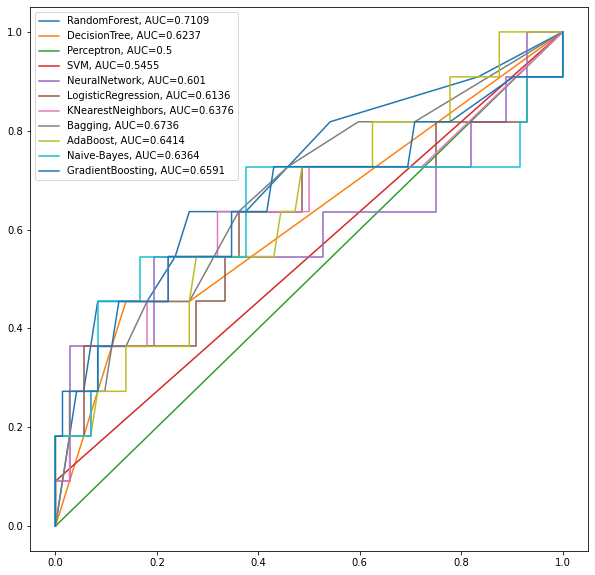

In [76]:
#set up plotting area
plt.figure(figsize=(10,10)).clf()

#fit logistic regression model and plot ROC curve
for i in range(len(FinalPredictionDF.columns)):
    y_pred = FinalPredictionDF.iloc[:,i]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) # 이진분류만 사용 가능
    auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
    plt.plot(fpr,tpr,label= names[i] + ", AUC="+str(auc))
    
#fit gradient boosted model and plot ROC curve

#add legend
plt.legend()
